# Sentiment Analysis

In [90]:
import pandas as pd
import nltk
import seaborn as sns 

from nltk.corpus import stopwords
from nltk import  tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud

df = pd.read_csv('data/train.csv')
df['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

# Tokenize Sentences to Analyze

In [91]:
paragraph = """I love to play wow! It is so fun."""
tokenize.sent_tokenize(paragraph)

['I love to play wow!', 'It is so fun.']

# Get Stopwords

In [92]:
try: 
    stops = stopwords.words('english')
except: 
    nltk.download('stopwords')
    stops = stopwords.words('english')

In [93]:
sent.polarity_scores(paragraph)

{'neg': 0.0, 'neu': 0.211, 'pos': 0.789, 'compound': 0.9426}

# Evaluate

In [94]:
def rm_stops(x): 
    words = x.split(' ')
    cleaned = [word for word in words if word.lower() not in stops]
    return ' '.join(cleaned)

def tok(x): 
    return tokenize.sent_tokenize(x)

def sentiment(x): 
    return sent.polarity_scores(x)

In [95]:
%%time 
sent = SentimentIntensityAnalyzer()

df['stop'] = df['text'].apply(rm_stops)
df['tok'] = df['stop'].apply(tok)
df['sentiment'] = df['text'].apply(sentiment)
df['sentiment'][1]

CPU times: total: 1.3 s
Wall time: 1.3 s


{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.34}

In [99]:
z = df['sentiment'].apply(pd.Series)
z[:1]

,neg,neu,pos,compound
0,0.0,0.851,0.149,0.2732


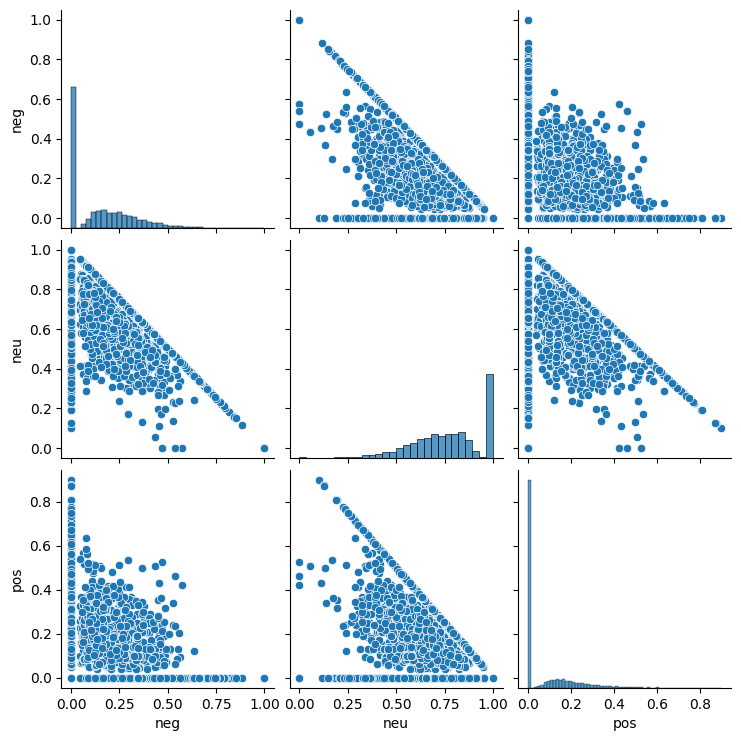

In [100]:
df = pd.concat([df,z], axis=1)
sns.pairplot(data=df[['neg','neu','pos']])